# ML Regression Algorithms from Scratch - Linear Regression 

## Introduction

In this notebook, first, we implement Linear Regression from Scratch using Numpy without Sklearn. After the scratch implementation, we also implement the Linear Regression using Sklearn and compare the two models. The complete code is written and executed in Google Colab. No need of installing any additional packages is required. Download this notebook and upload to Google Colab to run it by yourself. Don't forget to grab your Datasets! 

The Dataset used here is the **Salary_Data** dataset provided by the Super Data Science Team under their programme **Machine Learning A-Z: Hands on Python & R in Data Science**. Find the various datasets provided by them [here](https://www.superdatascience.com/pages/machine-learning).

**Response Variable** - Years of Experience

**Target Variable** - Salary

**Equation Used** - y = W1 * X1 + W0 * X0

**For Scratch Implementation:**
    
    Loss Function : Mean Squared Error

    Optimization Algorithm : SGD

    Weight Initialization : Xavier Initialization



## Linear Regression from Scratch without SKlearn

### Importing the Dependencies

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!cp /content/drive/MyDrive/Salary_Data.csv /content

### Get the Data and Data Preprocessing

In [3]:
#Get the dataset
dataset = pd.read_csv(r'/content/Salary_Data.csv')

In [4]:
#Get a glimpse of the Dataset
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#Separating the independent and dependent features
X = np.asarray(dataset['YearsExperience'].values.tolist()) #Independent feature
y = np.asarray(dataset['Salary'].values.tolist())          #Dependent feature

In [6]:
#Reshaping the Independent and Dependent features
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

In [7]:
#Independent Feature Scaling
X = (X - int(np.mean(X)))/np.std(X)

#Dependent Feature Scaling
y = (y - int(np.mean(y)))/np.std(y)

In [8]:
#Adding the feature X0 = 1, so we have the equation: y =  (W1 * X1) + (W0 * X0) 
X = np.concatenate((X,np.ones((30,1))), axis = 1)

In [9]:
X

array([[-1.39775469,  1.        ],
       [-1.32607497,  1.        ],
       [-1.25439524,  1.        ],
       [-1.07519592,  1.        ],
       [-1.00351619,  1.        ],
       [-0.75263714,  1.        ],
       [-0.71679728,  1.        ],
       [-0.64511755,  1.        ],
       [-0.64511755,  1.        ],
       [-0.46591823,  1.        ],
       [-0.3942385 ,  1.        ],
       [-0.35839864,  1.        ],
       [-0.35839864,  1.        ],
       [-0.32255878,  1.        ],
       [-0.17919932,  1.        ],
       [-0.03583986,  1.        ],
       [ 0.03583986,  1.        ],
       [ 0.10751959,  1.        ],
       [ 0.32255878,  1.        ],
       [ 0.35839864,  1.        ],
       [ 0.64511755,  1.        ],
       [ 0.75263714,  1.        ],
       [ 1.03935606,  1.        ],
       [ 1.14687565,  1.        ],
       [ 1.32607497,  1.        ],
       [ 1.43359456,  1.        ],
       [ 1.61279388,  1.        ],
       [ 1.64863374,  1.        ],
       [ 1.89951279,

### Utility Methods

In [10]:
# The method "split_data" splits the given dataset into trainset and testset
# This is similar to the method "train_test_split" from "sklearn.model_selection"
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #set the seed for reproducible results
    indices = np.random.permutation(len(X))       #shuffling the indices
    data_test_size = int(X.shape[0] * test_size)  #Get the test size

    #Separating the Independent and Dependent features into the Train and Test Set
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

### Coding the LinearRegression Class

In [11]:
class linearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights 

    Returns:
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate
    index (int) : Index to fetch the corresponding values of W, X and y 

    Returns:
    W (array) : Update Values of Weight
    """
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[index][i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W[index]

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    """
    Parameters:
    X (array) : Independent Feature
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    y_pred (array) : Predicted Target Variable
    loss (float) : Calculated Sqaured Error Loss for y and y_pred
    """

    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(num_rows,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[i])
        cost+=loss
        W[i] = self.updateWeights(X,y_pred,y,W,alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W, train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights
    test_indices (list) : Index to fetch the corresponding values of W_trained,
                          X_test and y_test 

    Returns:
    test_pred (list) : Predicted Target Variable
    test_loss (list) : Calculated Sqaured Error Loss for y and y_pred
    """
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained[i], y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(sum(loss))
    return test_pred, test_loss
    

  
  def plotLoss(self, loss, epochs):
    """
    Parameters:
    loss (list) : Calculated Sqaured Error Loss for y and y_pred
    epochs (list): Number of Epochs

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()
  


### Performing Linear Regression

In [12]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

In [13]:
#declaring the "regressor" as an object of the class LinearRegression
regressor = linearRegression()

In [14]:
#Training 
W_trained, train_loss, num_epochs = regressor.train(X_train, y_train, epochs=1000, alpha=0.001)

In [15]:
#Testing on the Test Dataset
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

### Visualizing Results

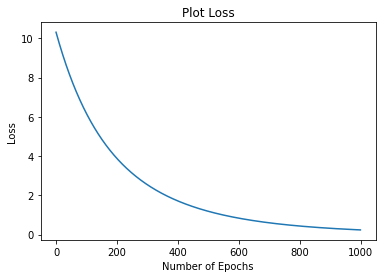

In [16]:
#Plot the Train Loss
regressor.plotLoss(train_loss, num_epochs)

## Linear Regression using Sklearn

### Importing dependencies

In [17]:
import pandas
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Data Preprocessing

In [18]:
dataset_sk = pd.read_csv('Salary_Data.csv')
X_sk = dataset_sk.iloc[:, :-1].values
y_sk = dataset_sk.iloc[:, 1].values

In [19]:
# Splitting the dataset into the Training set and Test set
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(X_sk, y_sk, test_size = 0.2, random_state = 0)

### Performing the Linear Regression

In [20]:
# Fitting Simple Linear Regression to the Training set
regressor_sk = LinearRegression()
regressor_sk.fit(X_train_sk, y_train_sk)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Predicting the Test set results
y_pred = regressor_sk.predict(X_test_sk)

### Visualizing the Results

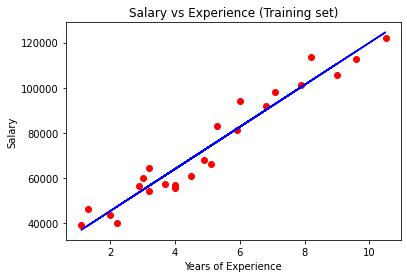

In [22]:
# Visualising the Training set results
plt.scatter(X_train_sk, y_train_sk, color = 'red')
plt.plot(X_train_sk, regressor_sk.predict(X_train_sk), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

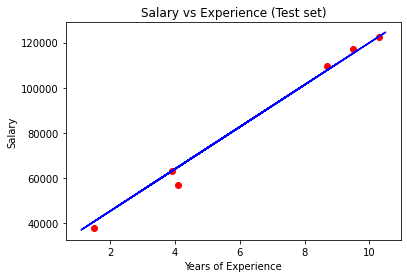

In [23]:
# Visualising the Test set results
plt.scatter(X_test_sk, y_test_sk, color = 'red')
plt.plot(X_train_sk, regressor_sk.predict(X_train_sk), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Comparing the Two Regressors

In [24]:
# MAE when the Sklearn Regressor is used
mean_absolute_error(y_test_sk,regressor_sk.predict(X_test_sk))

2446.1723690465055

In [25]:
# MAE when the Scratch Implementation Regressor is used
mean_absolute_error(y_test,test_pred)

1.5932558052100416

There can be various reasons behind these results like choice of loss function, Optimization Algorithm used, etc. However, the prime goal of this notebook was to demonstrate the implementation of Simple Linear Regression and not to perform better than Sklearn. 

Definitely, you can download this notebook and change hyperparameters, Optimization Algorithm, etc. and try to start your Machine Learning Journey.

